# A2 - Python for data Analyst

The purpose of this assignment is to analyze restaurant data using Python, applying data preprocessing and visualization techniques to gain insights and ultimately identify strategies to increase orders. The analysis includes detailed code descriptions and explanations of the logic behind each step.


Our primary goal is to boost order volume, and our descriptive analysis will center on identifying strategies to achieve this. By examining factors like restaurant demographics, order patterns, popular items, and orders time series analysis, we aim to gain actionable insights into how to increase orders.


Files needed for the analysis:

*   items.pickle
*   orders.pickle
*   orders_7.pickle
*   restaurants.pickle
*   summarized_orders.pickle

Before proceeding, ensure that all necessary data files are in CSV format and have the correct filenames. Remember that the Google Colab environment does not persistently store files. Therefore, you'll need to re-upload the files each time you start a new session or restart the runtime

References:

* Google.(2024). Gemini. Google Colaboratory. Retrieved December 4th, 2024
* Data from "Python for Data Analyst Class" By De la Maza

##Libraries & Upload files
Importing necessary packages and datasets

In [1]:
# Libraries that we used in the code.
# Please run this cell first.

import pandas as pd # This library is used for Dataframes, like excel in python for data manipulation and analysis.
import matplotlib.pyplot as plt # This library is used for static, animated, and interactive visualizations.
import seaborn as sns # This visualization library is based on matplotlib. We used this to provide a high-level interface for informative statistics.
import plotly.express as px # A library that contains functions that we used to create entire figures such as dynamic maps.
import folium # Folium is a Python library that we used for creating our interactive map.

In [2]:
# This step uploads the files using pandas library to read the csv files.
df_items = pd.read_pickle('items.pickle')
df_orders = pd.read_pickle('orders.pickle') # NOTE: orders.pickle & order_7.pickle takes several minutes to load into google collab
df_all_orders = pd.read_pickle('orders_7.pickle')
df_restaurants = pd.read_pickle('restaurants.pickle')
df_summarized_orders = pd.read_pickle('summarized_orders.pickle')

#Understand the data

We used shape, info, head() and in some case describe to understand the dimensions, preview the data in each DataFrame and have some initial insights for each table.

##Items
Dimensions:
* 31 rows and 3 columns.

Columns:
* ITEM_ID: A unique identifier for each item (datatype: object).
* ITEM_NAME: The name of the item (data type: object).
* ITEM_TYPE: The category or type of the item (data type: object).



In [3]:
# Dimension of the data frame 'Items'
df_items.shape

(31, 3)

In [4]:
# To understand the data and see the head of the dataframe, please run this function to return the first 5 rows for the 'Items' table.
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [5]:
# This function is to understand the datatypes and check if there are any null values.
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ITEM_ID    31 non-null     object
 1   ITEM_NAME  31 non-null     object
 2   ITEM_TYPE  31 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes


##Orders

* 2387224 rows and 10 columns.

Column names:
* ORDER_ID	DATETIME
* RESTAURANT_ID
* TYPE	DRINKS
* COOKIES	MAIN
* BASE
* SIDE_1
* SIDE_2

We are not using the orders table for two reasons, The first reason is because the orders table and orders_7 table has the same information but the orders table provide the names associated with all ID and their respective ID. The second reason is because they have the same amount of rows so we don't need to worry about losing data.

In [6]:
# Get the dimensions (number of rows and columns) of the 'df_orders' DataFrame.
df_orders.shape

(2387224, 10)

In [7]:
# Display the first 5 rows of the DataFrame 'df_orders' to preview its content.
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [8]:
# Print a concise summary of the DataFrame 'df_orders', including data types and memory usage.
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387224 entries, 0 to 2387223
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ORDER_ID       object        
 1   DATETIME       datetime64[ns]
 2   RESTAURANT_ID  object        
 3   TYPE           object        
 4   DRINKS         float64       
 5   COOKIES        float64       
 6   MAIN           object        
 7   BASE           object        
 8   SIDE_1         object        
 9   SIDE_2         object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 182.1+ MB


##All_Orders

* 2387224 rows and 15 columns
* Columns: ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN	BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME

In [9]:
# Get the dimensions (number of rows and columns) of the 'df_all_orders' DataFrame.
df_all_orders.shape

(2387224, 15)

In [10]:
# Display information about the DataFrame, including data types and memory usage.
df_all_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2387224 entries, 0 to 2387223
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   DATETIME         datetime64[ns]
 2   RESTAURANT_ID    object        
 3   TYPE             object        
 4   DRINKS           float64       
 5   COOKIES          float64       
 6   MAIN             object        
 7   BASE             object        
 8   SIDE_1           object        
 9   SIDE_2           object        
 10  RESTAURANT_NAME  object        
 11  MAIN_NAME        object        
 12  BASE_NAME        object        
 13  SIDE_1_NAME      object        
 14  SIDE_2_NAME      object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 291.4+ MB


In [11]:
# Display the first 5 rows of the DataFrame 'df_all_orders' to preview its content.
df_all_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


In [12]:
# Count the occurrences of each unique value in the 'TYPE' column of the 'df_all_orders' DataFrame.
df_all_orders.TYPE.value_counts()

,count
TYPE,
IN_STORE,1713136
PICKUP,401440
DELIVERY,272648


##Restaurants

* Structure (8, 7)
* Columns: RESTAURANT_ID, NAME, ADDRESS, LAT, LONG, OPENING_DATE, DELIVERY_START

In [13]:
# Get the dimensions (number of rows and columns) of the 'df_restaurants' DataFrame.
df_restaurants.shape

(8, 7)

In [14]:
# Display the first 5 rows of the DataFrame 'df_restaurants' to preview its content.
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01


In [15]:
# Count the occurrences of each unique restaurant name in the 'NAME' column of the 'df_restaurants' DataFrame.
df_restaurants.NAME.value_counts()

,count
NAME,
Columbia,1
Midtown,1
Flatiron,1
Williamsburg,1
NYU,1
Bryant Park,1
Upper East Side,1
Upper West Side,1


##Summarized_Orders

* Structure (2806, 4)
* Columns: RESTAURANT_NAME, DATE, NUM_ORDERS, PERC_DELIVERY

In [16]:
# Get the dimensions (number of rows and columns) of the 'df_summarized_orders' DataFrame.
df_summarized_orders.shape

(2806, 4)

In [17]:
# Display the first 5 rows of the DataFrame 'df_summarized_orders' to preview its content.
df_summarized_orders.head()

,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0


#Questions

## Brainstorm 🧠
Based on data, we brainstormed some key insights that could be usefull.

* Top and Bottom Performing Locations ✅
  * Identify the locations with the highest and lowest order volumes to address areas needing improvement.
* Best and Worst-Selling Items ✅
  * Understand which items are customer favorites and which underperform to optimize inventory and target promotions effectively.
* Most Popular Combos✅
  * Highlight best-selling combinations in main and base to know what combos attract more customers and can boost sales.
* Delivery Completion Rates✅
  * Analyze the percentage of completed deliveries to pinpoint and resolve any operational inefficiencies.
* Delivery vs.In-Store Pickup Preferences ✅
  * Determine the breakdown of orders fulfilled through delivery versus in-store pickup to tailor services and promotions accordingly.
* Performance of Cookies and Drinks ✅
  * Evaluate order contributions of these items and consider bundling them with meals to drive additional revenue.
* Best Time of Day for Orders ✅
  * Identify peak order times to plan staff schedules, promotions, and marketing efforts for maximum impact.
* Orders time series analysis ✅
  * Analyze order patterns from fiscal year 2018 to identify overall trends and provide actionable insights.


# Location with most orders & least orders? ✅


In [18]:
# Group the 'df_summarized_orders' DataFrame by 'RESTAURANT_NAME' and calculate the total 'NUM_ORDERS' for each restaurant.
restaurant_orders = df_summarized_orders.groupby('RESTAURANT_NAME')['NUM_ORDERS'].sum()

# Create a new DataFrame with restaurant names and their total orders, sorted in descending order.
location_order = pd.DataFrame({'Location': restaurant_orders.index, 'Num_Orders': restaurant_orders.values}).sort_values('Num_Orders', ascending=False)
location_order

,Location,Num_Orders
4,NYU,430860
3,Midtown,325265
7,Williamsburg,314674
2,Flatiron,281983
6,Upper West Side,281186
5,Upper East Side,275001
1,Columbia,250810
0,Bryant Park,227445


The restaurant in NYU has the most orders followed by Midtown with 430k orders and 325k orders respectively while Bryant Park has the least amount of orders with 227k orders.



# Restaurant locations ✅

In [19]:
# Merge 'location_order' with 'df_restaurants' to add latitude and longitude information for each restaurant.
location_order_table = location_order.merge(df_restaurants[['NAME', 'LAT', 'LONG']], left_on='Location', right_on='NAME', how='left')

# Display the final 'location_order_table' containing restaurant names, total orders, and location coordinates.
location_order_table

,Location,Num_Orders,NAME,LAT,LONG
0,NYU,430860,NYU,40.729930,-74.000820
1,Midtown,325265,Midtown,40.763640,-73.977960
2,Williamsburg,314674,Williamsburg,40.713749,-73.965782
3,Flatiron,281983,Flatiron,40.743600,-73.991070
4,Upper West Side,281186,Upper West Side,40.775430,-73.982050
5,Upper East Side,275001,Upper East Side,40.772010,-73.960780
6,Columbia,250810,Columbia,40.811470,-73.961230
7,Bryant Park,227445,Bryant Park,40.752911,-73.983498


In [20]:
# Create a folium map centered on New Jersey
map_center = [location_order_table['LAT'].mean(), location_order_table['LONG'].mean()] # Define the latitude and longitude for the center of the map
NY_map = folium.Map(location=map_center, zoom_start=8)  # Create the map object with the specified center and zoom level

# Add markers for each restaurant using Marker instead of CircleMarker, displaying the restaurant's location name in a popup and using a blue icon. Include the num_orders in the tag.
for index, row in location_order_table.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LONG']],
        popup=f"{row['Location']}<br>Num Orders: {row['Num_Orders']}", # corrected popup
        icon=folium.Icon(color='blue'),
    ).add_to(NY_map)

# Display the map
display(NY_map)

This figure shows where every restaurant is located. The top three busiest restuarants are all located near hot beds for tourism and students. By looking at the map it makes sense why Bryant parks order count is so low. Bryant park is located in between some of the highest ordered restaurant (midtown and flatiron) more than likely these two restaurants are cannibalizing bryant park. When we take a look at Columbia it is inusual that it has fewer orders thant the others restaurants considering it is located next Columbia University as we delve deeper into the data we could develop insights as to why this is occuring  


Now that we know which restaurants sell the most and why, lets dive deep into the most sold items and the most sold main base combo. So that we could give recommendation on which items we should keep and which we should get rid of.

# Items Sold the most/least? ✅

In [21]:
# Combine item columns into a single Series.
all_items = pd.concat([df_all_orders['MAIN_NAME'], df_all_orders['BASE_NAME'], df_all_orders['SIDE_1_NAME'], df_all_orders['SIDE_2_NAME']])

# Calculate the frequency of each item.
all_item_counts = all_items.value_counts()

# Convert the Series to a DataFrame.
all_item_counts = pd.DataFrame(all_item_counts).reset_index()
# Rename the columns.
all_item_counts.columns = ['Item', 'Count']

# Display the DataFrame.
all_item_counts

,Item,Count
0,Roasted Sweet Potatoes,995263
1,Snap Peas,986450
2,Farm Greens with Mint,918077
3,Farro with Summer Vegetables,849049
4,Charred Chicken Marketbowl,693847
5,Herb Roasted Chicken Marketbowl,693502
6,Cauliflower with Garlic and Parmesan,628136
7,Spicy Meatballs Marketbowl,590685
8,Classic Brown Rice,508513
9,Charred Broccoli with Lemon,460190


<ipython-input-22-18e974b6a05a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Count', data=all_item_counts, palette='viridis')


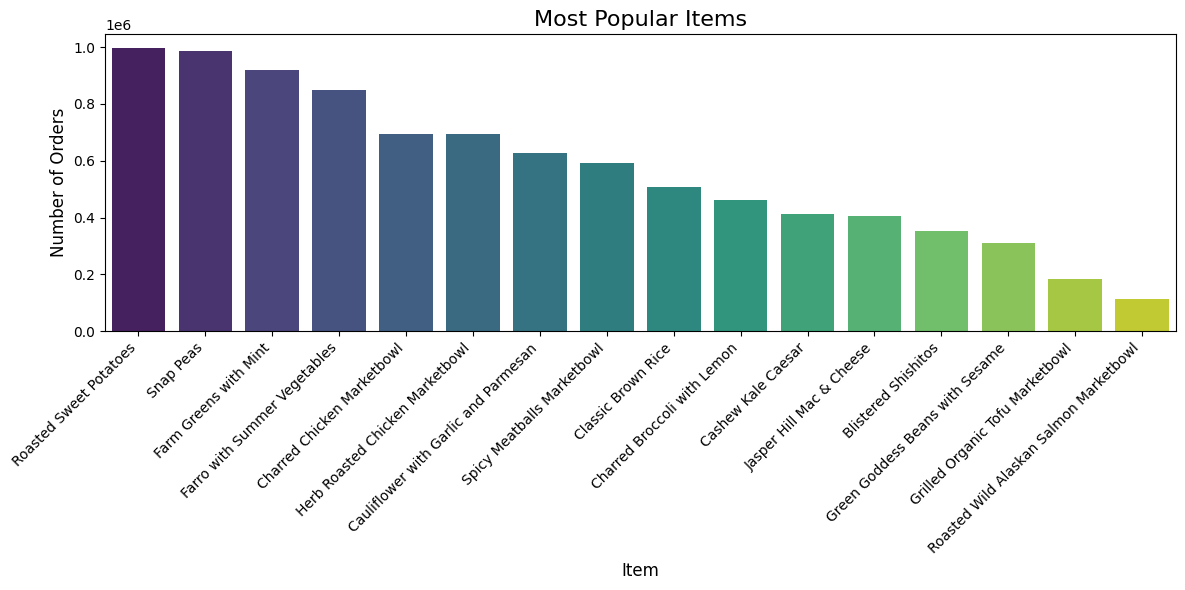

In [22]:
# Create a figure and set its size.
plt.figure(figsize=(12, 6))
# Create the bar plot using Seaborn.
sns.barplot(x='Item', y='Count', data=all_item_counts, palette='viridis')

# Set the plot title.
plt.title('Most Popular Items', fontsize=16)
# Set the x-axis label.
plt.xlabel('Item', fontsize=12)
# Set the y-axis label.
plt.ylabel('Number of Orders', fontsize=12)
# Rotate x-axis labels for readability.
plt.xticks(rotation=45, ha='right')

# Adjust plot layout.
plt.tight_layout()
# Display the plot.
plt.show()

Our data reveals that sides like 'Roasted Sweet Potatoes,' 'Snap Peas,' and 'Farm Greens with Mint' lead in popularity, while protein-rich marketbowls, such as 'Charred Chicken' and 'Herb Roasted Chicken,' are top choices. Plant-based and pescatarian options, like 'Grilled Organic Tofu' and 'Wild Alaskan Salmon,' show steady demand, highlighting potential growth opportunities.



In [23]:
# Perform a left outer join
items_not_ordered = pd.merge(df_items, all_item_counts, left_on='ITEM_NAME', right_on='Item', how='left')

# Filter for items not in all_item_counts (Count is NaN)
items_not_ordered = items_not_ordered[items_not_ordered['Count'].isnull()]

# Display the items not being ordered in a DataFrame
print("Items (Not drinks) not being ordered:")
# Filter out drinks from items_not_ordered because in the orders it does not say what type of drink people are ordering
filtered_items_not_ordered = items_not_ordered[items_not_ordered['ITEM_TYPE'] != 'Drinks']
filtered_items_not_ordered[['ITEM_NAME', 'ITEM_TYPE']]


Items (Not drinks) not being ordered:


,ITEM_NAME,ITEM_TYPE
7,Kitchen Sink Cookie,Desserts
10,Garlic Aioli,Sauces
14,Housemade Sriracha,Sauces
16,Avocado,Cold Sides
24,Tarragon Mustard,Sauces
25,Pesto,Sauces
30,Himalayan Pink Organic Popcorn,Desserts


This is the list of items that are not being ordered

# What is the most sold combo ✅

In [24]:
# Create a new 'Combo' column by combining item names.
df_all_orders['Combo'] = df_all_orders['MAIN_NAME']+' & '+df_all_orders['BASE_NAME']

# Calculate the frequency of each item combination.
item_counts = df_all_orders['Combo'].value_counts()

# Print a header for the output.
print("Most Sold combo:")
# Create a DataFrame to display the item counts.
pd.DataFrame(item_counts)

Most Sold combo:


,count
Combo,
Herb Roasted Chicken Marketbowl & Farm Greens with Mint,280243
Charred Chicken Marketbowl & Farm Greens with Mint,279591
Herb Roasted Chicken Marketbowl & Farro with Summer Vegetables,259056
Charred Chicken Marketbowl & Farro with Summer Vegetables,258945
Spicy Meatballs Marketbowl & Farm Greens with Mint,238509
Spicy Meatballs Marketbowl & Farro with Summer Vegetables,220116
Charred Chicken Marketbowl & Classic Brown Rice,155311
Herb Roasted Chicken Marketbowl & Classic Brown Rice,154203
Spicy Meatballs Marketbowl & Classic Brown Rice,132060


<ipython-input-25-54fc4555b2b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Combo', data=top_10_combos, palette='viridis')


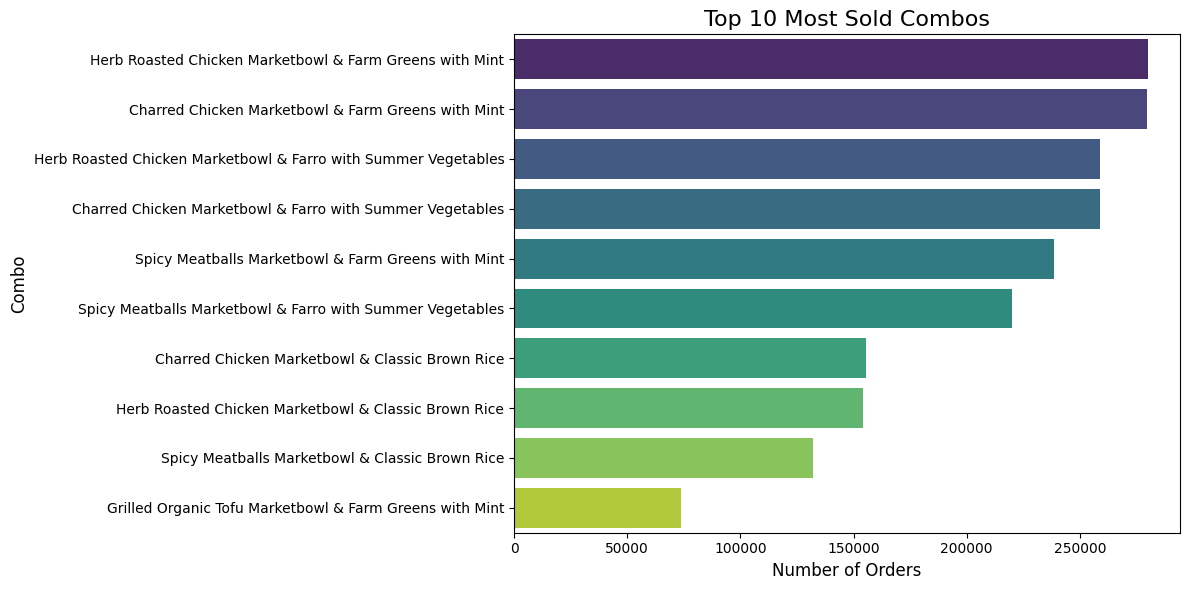

In [25]:
# Convert the Series to a DataFrame and reset the index
combo_counts_df = pd.DataFrame(item_counts).reset_index()
combo_counts_df.columns = ['Combo', 'Count']  # Rename columns

# Select the top 10 most sold combos
top_10_combos = combo_counts_df.head(10)

# Create the horizontal bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Count', y='Combo', data=top_10_combos, palette='viridis')

plt.title('Top 10 Most Sold Combos', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Combo', fontsize=12)

plt.tight_layout()
plt.show()

The most popular pairings are 'Herb Roasted Chicken Marketbowl' or 'Charred Chicken Marketbowl' with 'Farm Greens with Mint,' each ordered over 280,000 times. Customers favor balanced meals that combine proteins with fresh sides like greens or grains.
Key takeaways include leveraging the popularity of chicken-based marketbowls, promoting plant-based and pescatarian options, and exploring new pairings to maintain customer engagement. These insights allow us to refine our offerings and better meet customer expectations.

# Percentage of completed deliveries ✅

In [26]:
# Group data by restaurant name and calculate mean order metrics.
restaurant_summary = df_summarized_orders.groupby('RESTAURANT_NAME').agg(
    Mean_num_orders=('NUM_ORDERS', 'mean'),
    Mean_Perc_Delivery=('PERC_DELIVERY', 'mean')
)
# Create a DataFrame and sort it by delivery percentage.
restaurant_summary_delivery = pd.DataFrame(restaurant_summary).sort_values('Mean_Perc_Delivery', ascending=False)

# Display the sorted DataFrame.
restaurant_summary_delivery

,Mean_num_orders,Mean_Perc_Delivery
RESTAURANT_NAME,,
Upper East Side,774.650704,0.190314
Upper West Side,770.372603,0.190129
Flatiron,772.556164,0.101907
Williamsburg,862.120548,0.101493
Columbia,687.150685,0.101393
NYU,1180.438356,0.101075
Bryant Park,871.436782,0.068180
Midtown,891.136986,0.067296


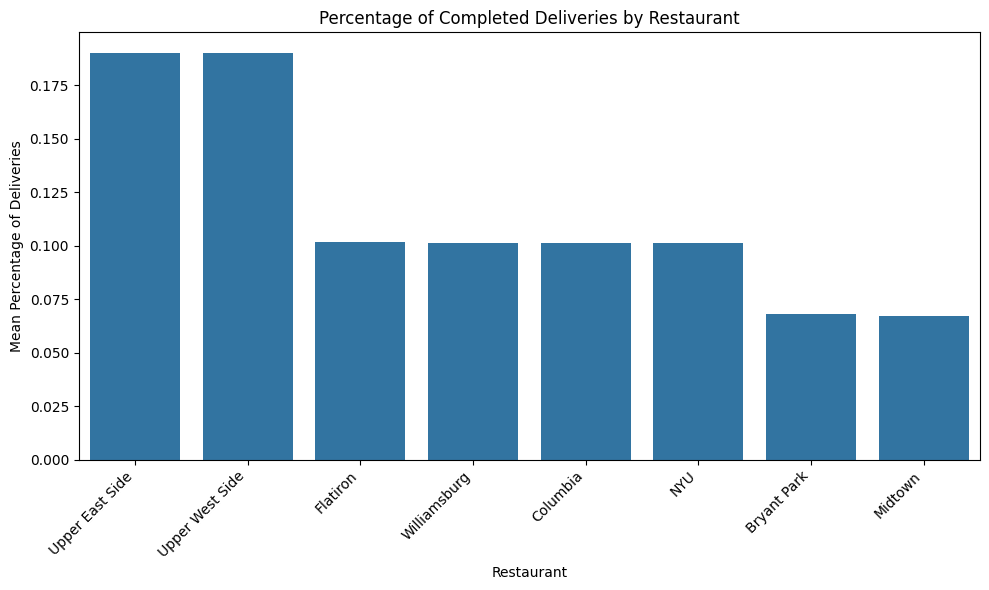

In [27]:
# Create a figure and set its size.
plt.figure(figsize=(10, 6))
# Create a bar plot using Seaborn.
sns.barplot(x=restaurant_summary_delivery.index, y='Mean_Perc_Delivery', data=restaurant_summary_delivery)
# Set the title of the plot.
plt.title('Percentage of Completed Deliveries by Restaurant')
# Set the label for the x-axis.
plt.xlabel('Restaurant')
# Set the label for the y-axis.
plt.ylabel('Mean Percentage of Deliveries')
# Rotate x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')
# Adjust the plot layout.
plt.tight_layout()
# Display the plot.
plt.show()

The Upper East Side and Upper West Side have the highest mean delivery percentages (0.1903 and 0.1901 respectively). These locations also have relatively high average order counts. Restaurants like Flatiron, Williamsburg, and Columbia have mean delivery percentages around 0.101, which is significantly lower than the top performers. Bryant Park and Midtown have the lowest mean delivery percentages (0.0682 and 0.0673 respectively), despite having higher order counts than some others.
Outlier in Order Count:
The NYU location has the highest average number of orders (1180.38), but its delivery completion percentage is not proportionately high (0.1011).

# What percent is deliveries / in-store pickups ✅

In [28]:
# What percentage is deliveries/Pickup vs in-store pickups?
# Calculate the frequency of each order type.
type_counts = df_all_orders.TYPE.value_counts()
# Calculate the percentage of each order type.
type_percentages = (type_counts / type_counts.sum()) * 100
# Display the calculated percentages.
type_percentages

,count
TYPE,
IN_STORE,71.762683
PICKUP,16.816185
DELIVERY,11.421132


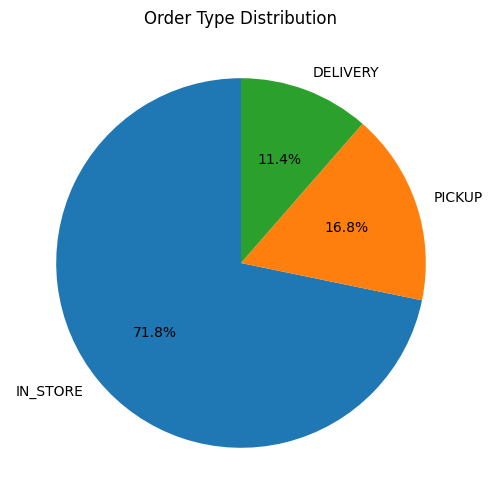

In [29]:
# Create a figure and axes for the pie chart.
plt.figure(figsize=(6, 6))
# Create the pie chart.
plt.pie(type_percentages, labels=type_percentages.index, autopct='%1.1f%%', startangle=90)
# Set the title of the pie chart.
plt.title('Order Type Distribution')
# Display the pie chart.
plt.show()

This pie chart shows the desparity between the in-store dinners (71.8%) vs those who prefer to dine at home (28.2%)

In [30]:
# Group data by restaurant and order type, then count orders.
restaurant_type = df_all_orders.groupby(['RESTAURANT_NAME', 'TYPE'])['ORDER_ID'].count().reset_index()
# Calculate the total orders for each restaurant.
total_orders_per_restaurant = restaurant_type.groupby('RESTAURANT_NAME')['ORDER_ID'].transform('sum')
# Calculate the percentage of each order type for each restaurant.
restaurant_type['percentage'] = (restaurant_type['ORDER_ID'] / total_orders_per_restaurant) * 100
# Display the resulting DataFrame.
restaurant_type

,RESTAURANT_NAME,TYPE,ORDER_ID,percentage
0,Bryant Park,DELIVERY,15613,6.864517
1,Bryant Park,IN_STORE,171494,75.400207
2,Bryant Park,PICKUP,40338,17.735277
3,Columbia,DELIVERY,25247,10.066186
4,Columbia,IN_STORE,182603,72.805311
5,Columbia,PICKUP,42960,17.128504
6,Flatiron,DELIVERY,28859,10.234305
7,Flatiron,IN_STORE,204607,72.560048
8,Flatiron,PICKUP,48517,17.205647
9,Midtown,DELIVERY,22380,6.880544


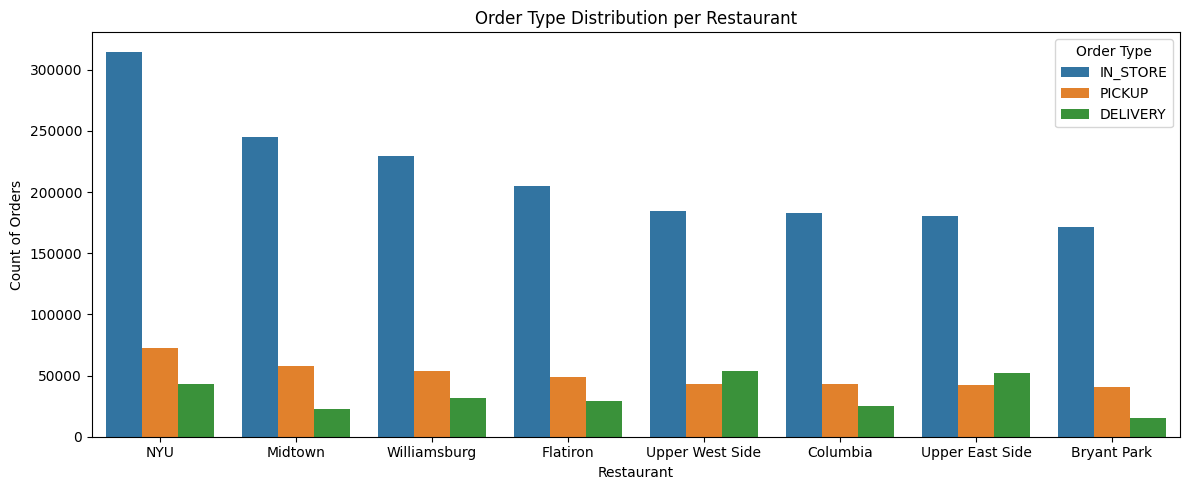

In [31]:
# Sort the DataFrame by order count in descending order.
restaurant_type = restaurant_type.sort_values('ORDER_ID', ascending=False)
# Create a figure and axes for the plot.
plt.figure(figsize=(12, 5))
# Create a bar plot using Seaborn.
sns.barplot(x='RESTAURANT_NAME', y='ORDER_ID', hue='TYPE', data=restaurant_type)

# Set the title of the plot.
plt.title('Order Type Distribution per Restaurant')
# Set the label for the x-axis.
plt.xlabel('Restaurant')
# Set the label for the y-axis.
plt.ylabel('Count of Orders')
# Add a legend to the plot.
plt.legend(title='Order Type')

# Adjust the plot layout to prevent overlapping elements.
plt.tight_layout()

This figure highlights the desparity between instore pick-up and deliveries. It is clear based on the graph that every restuarant is relatively set when it comes to instore pick ups, with new NYU having the most. Again I would like to point out just how little pickup and delivery orders the restaurants have.

# Performance of Cookies and Drinks ✅

In [32]:
# Count orders with at least one cookie.
cookie_orders = df_all_orders[df_all_orders['COOKIES'] >= 1]['ORDER_ID'].count()
# Count total orders.
total_orders = df_all_orders['ORDER_ID'].count()
# Calculate the percentage of orders with cookies.
cookie_percentage = (cookie_orders / total_orders) * 100

# Count orders with at least one drink.
drink_orders = df_all_orders[df_all_orders['DRINKS'] >= 1]['ORDER_ID'].count()
# Calculate the percentage of orders with drinks.
drink_percentage = (drink_orders / total_orders) * 100

# Count orders with both cookies and drinks.
both_orders = df_all_orders[(df_all_orders['COOKIES'] >= 1) & (df_all_orders['DRINKS'] >= 1)]['ORDER_ID'].count()
# Calculate the percentage of orders with both.
both_percentage = (both_orders / total_orders) * 100

# Print the calculated percentages.
print(f"Percentage of orders with cookies: {cookie_percentage:}%")
# Print the calculated percentages.
print(f"Percentage of orders with drinks: {drink_percentage:}%")
# Print the calculated percentages.
print(f"Percentage of orders with both cookies and drinks: {both_percentage:.2f}%")

# Create a dictionary to store the data for the DataFrame.
data = {
    'Item': ['Cookies', 'Drinks', 'Both Cookies & Drinks','None'],
    'Percentage': [cookie_percentage, drink_percentage, both_percentage, 100-cookie_percentage-drink_percentage-both_percentage]
}
# Create a pandas DataFrame from the dictionary.
df = pd.DataFrame(data)
# Display the DataFrame.
df

Percentage of orders with cookies: 19.960715877521338%
Percentage of orders with drinks: 7.849954591609333%
Percentage of orders with both cookies and drinks: 1.56%


,Item,Percentage
0,Cookies,19.960716
1,Drinks,7.849955
2,Both Cookies & Drinks,1.558253
3,None,70.631076


<ipython-input-33-a4b6fa611474>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Percentage', data=df, palette='viridis')


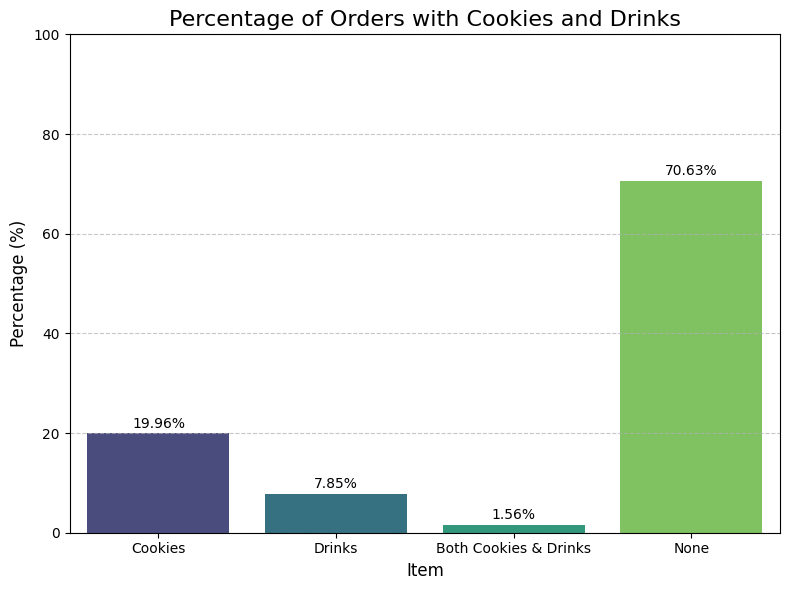

In [33]:
# Create a Matplotlib figure and set its size.
plt.figure(figsize=(8, 6))
# Create the bar plot using Seaborn.
sns.barplot(x='Item', y='Percentage', data=df, palette='viridis')

# Set the title of the plot.
plt.title('Percentage of Orders with Cookies and Drinks', fontsize=16)
# Set the x-axis label.
plt.xlabel('Item', fontsize=12)
# Set the y-axis label.
plt.ylabel('Percentage (%)', fontsize=12)
# Set x-axis tick rotation and alignment.
plt.xticks(rotation=0, ha='center')
# Set the y-axis limits.
plt.ylim(0, 100)
# Add a grid to the plot.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to each bar.
for index, row in df.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.2f}%", ha='center', va='bottom')

# Adjust the plot layout to prevent overlapping elements.
plt.tight_layout()
# Display the plot.
plt.show()

This graph shows the popularity of cookies and drinks in orders, expressed as percentages. These percentages reflect customer preferences. The 70.63% of customers prefer no cookies nor drinks in their orders, however from the remainig 29.37%, 19.96% of orders are accompanied with cookies. The drinks make up 7.89% while both bought together are only 1.5% of all orders placed.

# Best time of the day ✅

In [34]:
# Create a copy of the DataFrame to avoid modifying the original.
df_all_orders_1 = df_all_orders.copy()
# Convert the 'DATETIME' column to datetime objects.
df_all_orders_1['DATETIME'] = pd.to_datetime(df_all_orders_1['DATETIME'])

# Create a new 'Meal_Time' column using pd.cut.
df_all_orders_1['Meal_Time'] = pd.cut(
    df_all_orders_1['DATETIME'].dt.hour,
    bins=[0, 11, 16, 24],
    labels=['Breakfast', 'Lunch', 'Dinner']
)

# Group by 'Meal_Time' and count orders.
order_counts = df_all_orders_1.groupby(['Meal_Time'])['ORDER_ID'].count().reset_index()

# Rename columns for better readability.
order_counts.columns = ['Meal_Time', 'Order_Count']
# Display the DataFrame with order counts.
order_counts

<ipython-input-34-54ef1d741cfd>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts = df_all_orders_1.groupby(['Meal_Time'])['ORDER_ID'].count().reset_index()


,Meal_Time,Order_Count
0,Breakfast,236172
1,Lunch,1161290
2,Dinner,989762


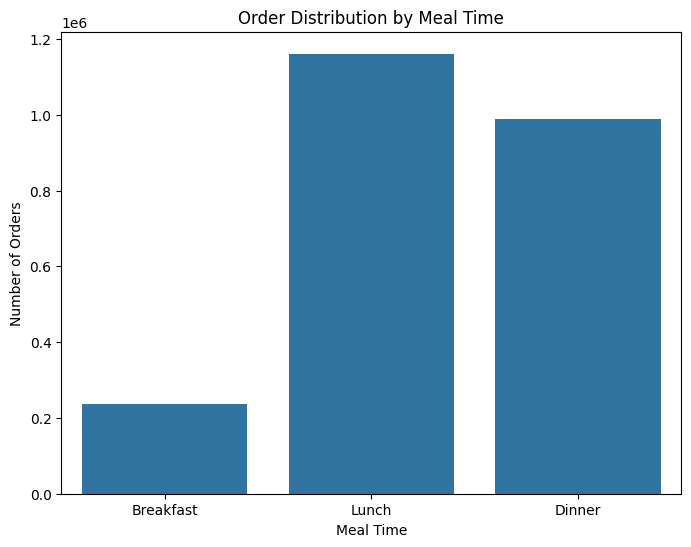

In [35]:
# Create a figure and axes for the plot.
plt.figure(figsize=(8, 6))
# Create a bar plot using Seaborn.
sns.barplot(x='Meal_Time', y='Order_Count', data=order_counts)

# Set the title of the plot.
plt.title('Order Distribution by Meal Time')
# Set the label for the x-axis.
plt.xlabel('Meal Time')
# Set the label for the y-axis.
plt.ylabel('Number of Orders')

# Display the plot.
plt.show()

Lunch Dominates:
The majority of orders occur during lunch, accounting for over 1.16 million orders, which is significantly higher than the others. Dinner has the second-highest number of orders (989,762), though it is substantially lower than lunch.Breakfast has the lowest number of orders (236,172), likely due to a smaller window of demand and fewer breakfast-oriented offerings.

In [36]:
# Create a copy of the DataFrame.
df_all_orders_lunch = df_all_orders.copy()
# Convert the 'DATETIME' column to datetime objects.
df_all_orders_lunch['DATETIME'] = pd.to_datetime(df_all_orders_lunch['DATETIME'])

# Filter for orders within lunch hours.
df_lunch_orders = df_all_orders_lunch[
    (df_all_orders_lunch['DATETIME'].dt.hour >= 11) & (df_all_orders_lunch['DATETIME'].dt.hour <= 16)
]

# Group by hour and count orders during lunch hours.
lunch_order_counts = df_lunch_orders.groupby(df_lunch_orders['DATETIME'].dt.hour)['ORDER_ID'].count().reset_index()

# Rename columns for better readability.
lunch_order_counts.columns = ['Hour', 'Order_Count']
# Display the DataFrame with lunch hour order counts.
lunch_order_counts

,Hour,Order_Count
0,11,197357
1,12,295692
2,13,290781
3,14,233597
4,15,171863
5,16,169357


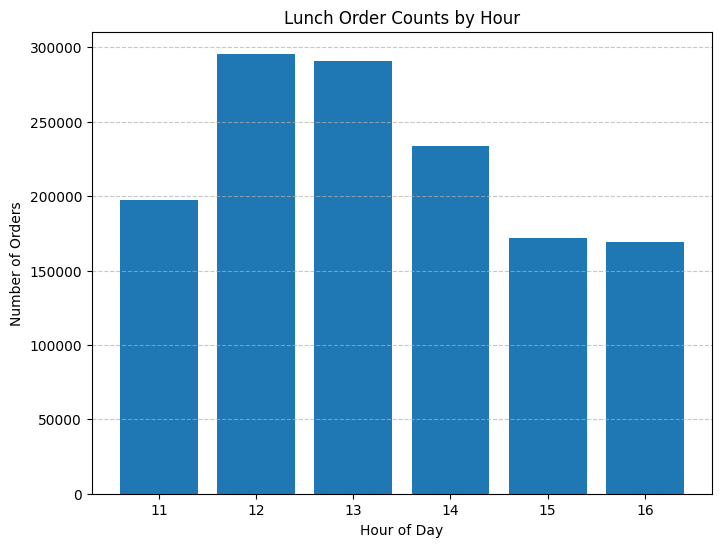

In [37]:
# Create a figure and axes for the plot.
plt.figure(figsize=(8, 6))
# Create the bar plot.
plt.bar(lunch_order_counts['Hour'], lunch_order_counts['Order_Count'])

# Set the title of the plot.
plt.title('Lunch Order Counts by Hour')
# Set the label for the x-axis.
plt.xlabel('Hour of Day')
# Set the label for the y-axis.
plt.ylabel('Number of Orders')
# Set the x-axis ticks.
plt.xticks(lunch_order_counts['Hour'])
# Add a grid to the plot.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

# Orders time series ✅

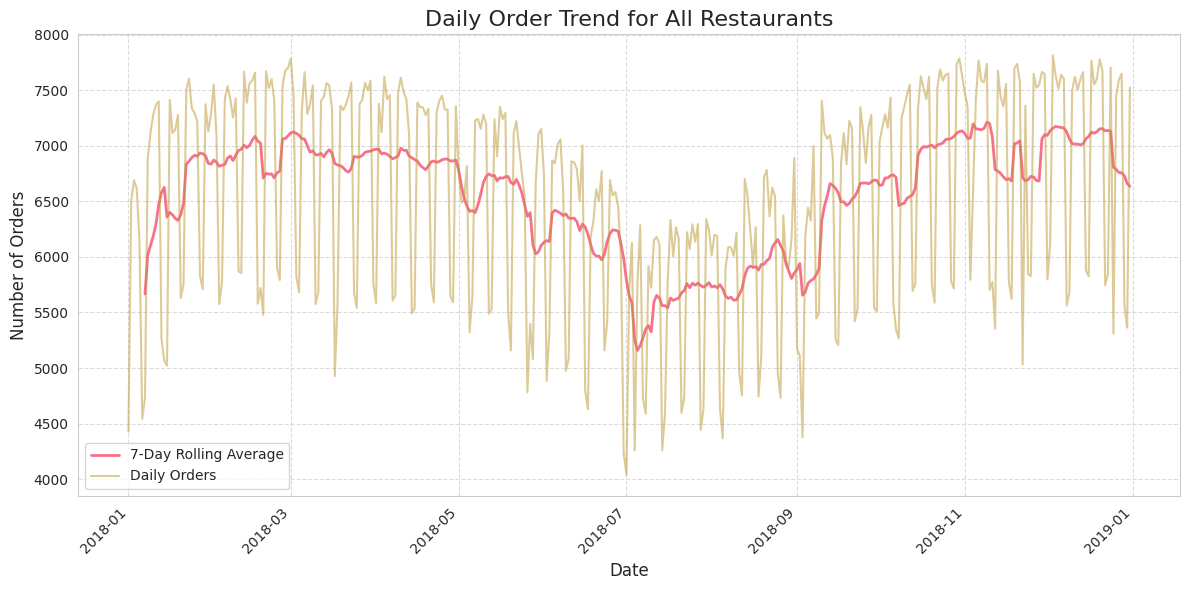

In [38]:
# Group orders by date and count order IDs.
daily_orders = df_all_orders.groupby(df_all_orders['DATETIME'].dt.date)['ORDER_ID'].count().reset_index()
# Rename columns for clarity.
daily_orders.columns = ['Date', 'ORDER_ID']
# Sort the DataFrame by date.
daily_orders = daily_orders.sort_values(by='Date')

# Calculate the 7-day rolling average of orders.
daily_orders['Rolling_Avg'] = daily_orders['ORDER_ID'].rolling(window=7).mean()

# Set the Seaborn style and color palette.
sns.set_style("whitegrid")
# Set the Seaborn style and color palette.
sns.set_palette("husl")

# Create a Matplotlib figure and set its size.
plt.figure(figsize=(12, 6))
# Plot the rolling average.
plt.plot(daily_orders['Date'], daily_orders['Rolling_Avg'], linewidth=2, label='7-Day Rolling Average')
# Plot the daily order counts.
plt.plot(daily_orders['Date'], daily_orders['ORDER_ID'], alpha=0.5, label='Daily Orders')

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')

# Add a grid to the plot.
plt.grid(True, linestyle='--', alpha=0.7)

# Set the title of the plot.
plt.title('Daily Order Trend for All Restaurants', fontsize=16)
# Set the label for the x-axis.
plt.xlabel('Date', fontsize=12)
# Set the label for the y-axis.
plt.ylabel('Number of Orders', fontsize=12)

# Add a legend to the plot.
plt.legend()
# Adjust the plot layout to prevent overlapping elements.
plt.tight_layout()
# Display the plot.
plt.show()

This Figure can tell us a lot about how the our orders change over time. The graph shows how daily orders change over time, It seems that when the universty has classes the restaurants experience relatively the same fluctation in orders, but the restaurants experience a big dip in orders during the summer months. This could be do to students not having a reason to come on campus.

# Specific Columbia Restaurant analysis ✅

Whe choose columbia because they were relatively far from the other restaurants and they had fewer orders than their peers, despite being close to university

In [39]:
# Filter dataframes for (Columbia) restaurant, if you want to see other restaurant change this two lines.
df_all_orders_columbia = df_all_orders[df_all_orders['RESTAURANT_NAME'] == 'Columbia']
df_summarized_orders_columbia = df_summarized_orders[df_summarized_orders['RESTAURANT_NAME'] == 'Columbia']

# Items Sold the most/least
all_items_columbus = pd.concat([df_all_orders_columbia['MAIN_NAME'], df_all_orders_columbia['BASE_NAME'], df_all_orders_columbia['SIDE_1_NAME'], df_all_orders_columbia['SIDE_2_NAME']])
all_item_counts_columbia = all_items_columbus.value_counts()
all_item_counts_columbia = pd.DataFrame(all_item_counts_columbia).reset_index()
all_item_counts_columbia.columns = ['Item', 'Count']

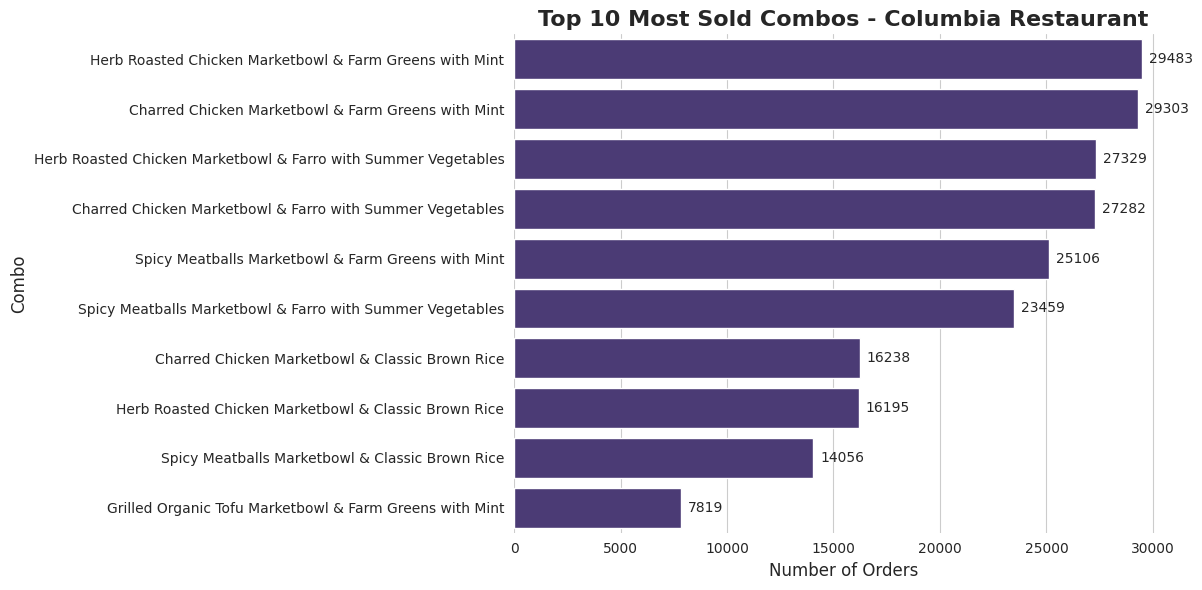

In [40]:
# Calculate combo counts and select top 10 directly
top_10_combos_columbia = (df_all_orders_columbia.assign(Combo=df_all_orders_columbia['MAIN_NAME'] + ' & ' + df_all_orders_columbia['BASE_NAME'])['Combo'].value_counts().head(10).reset_index(name='Count').rename(columns={'index': 'Combo'}))


# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Create the horizontal bar plot with data labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Count', y='Combo', data=top_10_combos_columbia)

# Add data labels more efficiently
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

# Customize the plot
plt.title('Top 10 Most Sold Combos - Columbia Restaurant', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Combo', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<ipython-input-41-f46814dd0e9f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Percentage', data=df, palette='viridis')  # Completed function call


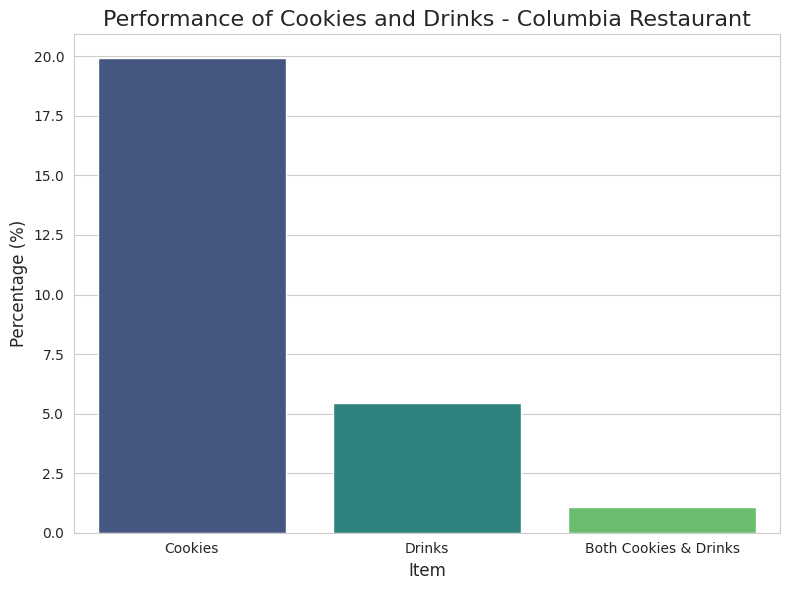

In [41]:

# Performance of Cookies and Drinks
cookie_orders_columbia = df_all_orders_columbia[df_all_orders_columbia['COOKIES'] >= 1]['ORDER_ID'].count()
total_orders_columbia = df_all_orders_columbia['ORDER_ID'].count()
cookie_percentage_columbia = (cookie_orders_columbia / total_orders_columbia) * 100
drink_orders_columbia = df_all_orders_columbia[df_all_orders_columbia['DRINKS']>= 1]['ORDER_ID'].count()
drink_percentage_columbia = (drink_orders_columbia / total_orders_columbia) * 100
both_orders_columbia = df_all_orders_columbia[(df_all_orders_columbia['COOKIES'] >= 1) & (df_all_orders_columbia['DRINKS'] >= 1)]['ORDER_ID'].count()
both_percentage_columbia = (both_orders_columbia / total_orders_columbia) * 100

data = {
    'Item': ['Cookies', 'Drinks', 'Both Cookies & Drinks'],
    'Percentage': [cookie_percentage_columbia, drink_percentage_columbia, both_percentage_columbia]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x='Item', y='Percentage', data=df, palette='viridis')  # Completed function call

plt.title('Performance of Cookies and Drinks - Columbia Restaurant', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-42-720ac852f545>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts_columbia = df_all_orders_columbia.groupby(['Meal_Time'])['ORDER_ID'].count().reset_index()


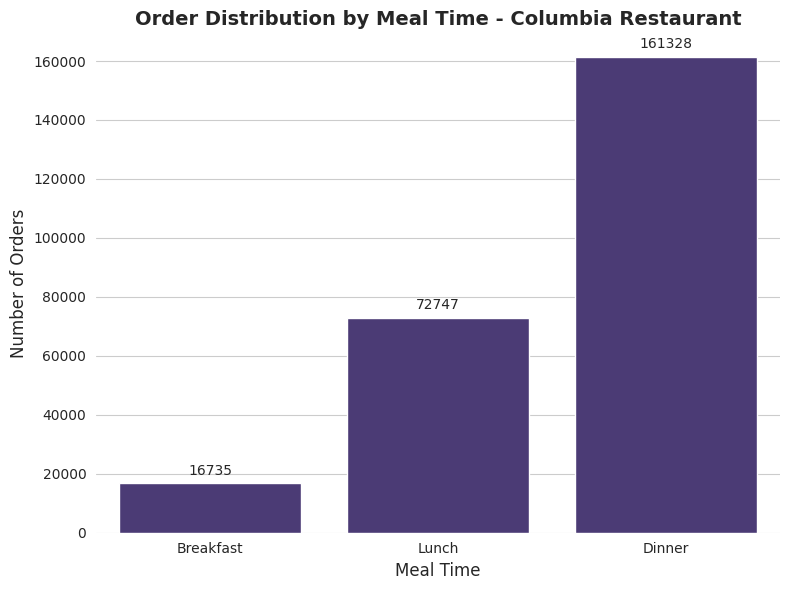

In [42]:
# Best time of the day
df_all_orders_columbia = df_all_orders_columbia.copy()  # Create an explicit copy
df_all_orders_columbia.loc[:, 'DATETIME'] = pd.to_datetime(df_all_orders_columbia['DATETIME'])
df_all_orders_columbia.loc[:, 'Meal_Time'] = pd.cut(
    df_all_orders_columbia['DATETIME'].dt.hour,
    bins=[0, 11, 16, 24],
    labels=['Breakfast', 'Lunch', 'Dinner']
)
order_counts_columbia = df_all_orders_columbia.groupby(['Meal_Time'])['ORDER_ID'].count().reset_index()
order_counts_columbia.columns = ['Meal_Time', 'Order_Count']

plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Meal_Time', y='Order_Count', data=order_counts_columbia)

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3000,  # Adjust position of labels
            '{:1.0f}'.format(height), ha="center", fontsize=10)

# Customize the plot
plt.title('Order Distribution by Meal Time - Columbia Restaurant', fontsize=14, fontweight='bold')
plt.xlabel('Meal Time', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


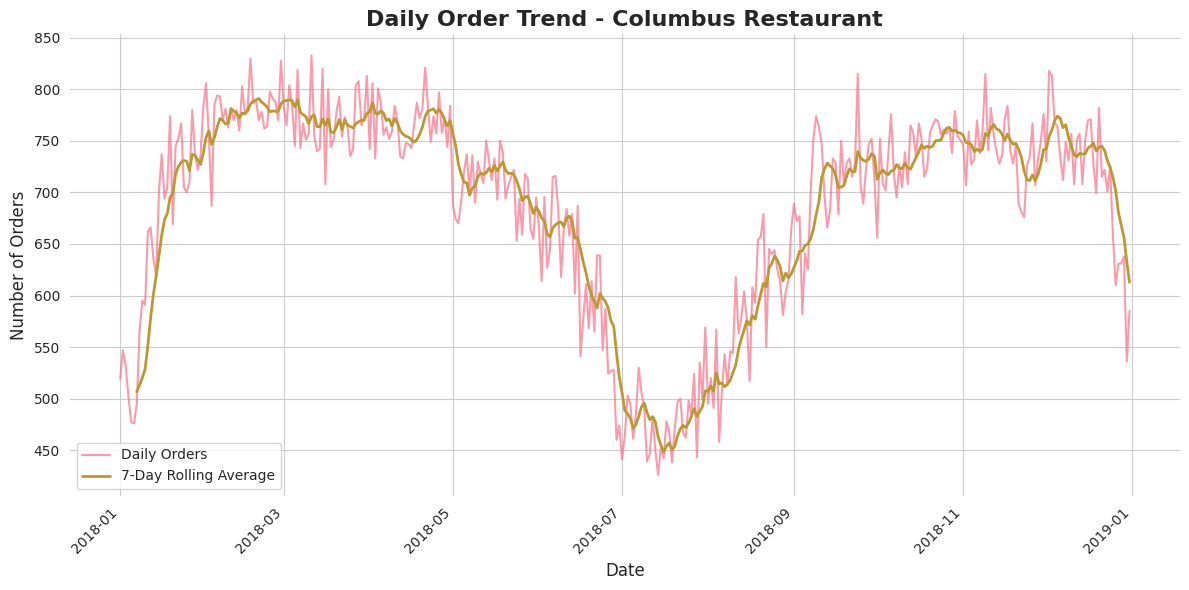

In [43]:

# Orders time series
daily_orders_columbia = df_all_orders_columbia.groupby(df_all_orders_columbia['DATETIME'].dt.date)['ORDER_ID'].count().reset_index()
daily_orders_columbia.columns = ['Date', 'ORDER_ID']
daily_orders_columbia = daily_orders_columbia
# Calculate the 7-day rolling average
daily_orders_columbia['Rolling_Avg'] = daily_orders_columbia['ORDER_ID'].rolling(window=7).mean()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Use a whitegrid background
sns.set_palette("husl")  # Use the 'husl' color palette

plt.plot(daily_orders_columbia['Date'], daily_orders_columbia['ORDER_ID'], label='Daily Orders', alpha=0.7)
plt.plot(daily_orders_columbia['Date'], daily_orders_columbia['Rolling_Avg'], label='7-Day Rolling Average', linewidth=2)

# Customize the plot
plt.title('Daily Order Trend - Columbus Restaurant', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.legend(fontsize=10)  # Add a legend

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Recommendations


### Based on all the above data we recommend ALL restaurants should do the following to increase orders

*   We recommend you to offer more delivery options. The future of the restaurant industry will be based on food-delivery services like Doordash and Uber eats. So diving into this section of the restaurant industry will help increase orders, by allowing students to not have to come to campus to get food which could help the increase the order drop off found during the summer.

*  Based on the underperforming percentage of deliveries, we recommend the use of a routing software, ensure adequate staffing, and prioritize urgent orders. Aditionally improve kitchen workflows, enable live order tracking, and reduce preparation times to elevate delivery percentages.

* We suggest cutting items that are not being sold out of the menu, Allocate all resources for more popular items. Such as Roasted Sweet Potatoes, and run promotions and targeted offers to maximize profitability.

* Expand Breakfast and Dinner Offerings. Overall restaurants shown low breakfast and dinner orders. Enhance breakfast options with promotions and targeted advertising to morning commuters and optimize dinner service with adequate staffing and promotions to boost satisfaction.

* Analyze order trends for seasonal or behavioral shifts. Customize the customer experience for each meal (e.g., quicker breakfast service, premium dinner options).



### Now focusing on Columbia, one of the underperforming restaurants, we note that its location suggests it should be generating higher order volumes. Our recommendations are:

* Based on the data, we recommend launching a promotional campaign featuring pre-designed meals with a main chicken dish and a base of greens. Chicken and greens combinations consistently rank as the most popular choice in the menu, presenting a strong opportunity to increase sales. Additionally, offering a complimentary cookie instead of a drink aligns with customer preferences, as the data shows cookies are favored over drinks.To address the imbalance between lunch and dinner orders, these promotions should be tailored specifically for lunch hours, a period with significantly lower sales compared to dinner. Lastly, to counteract seasonality challenges, focus on increasing delivery percentages, which currently lag behind other restaurants. Enhancing delivery services during the summer months, when orders typically decline due to students being out of session, could help maintain consistent revenue during these slower periods